# Diabetes EDA and predictive models
The project is conducted bsed on the avaiable dataset on Kaggle.com (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

### Project goals
**The project is aimed to build a predictive model to identify individuals at risk of diabetes**

Import necessary libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data structure
In the indicator dataset, there are 22 variables including:
- Diabetes_012: 0 = no diabetes, 1 = prediabetes, 2 = diabetes
- HighBP: 0 = no high, BP 1 = high BP
- HighChol: 0 = no high cholesterol, 1 = high cholesterol
- CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI: indicating the BMI of that person.
- Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no, 1 = yes
- Stroke: (Ever told) you had a stroke. 0 = no, 1 = yes
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity: physical activity in past 30 days - not including job: 0 = no, 1 = yes
- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump: Heavy drinkers. 0 = no 1 = yes
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
- GenHlth: Would you say that in general your health is: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
- MentHlthL: days in a month having mental illness: 1-30
- PhysHlth: days in a month having physical injuries: 1-30
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
- Sex: male or female. 0 = female 1 = male
- Age: age group: 1 = 18-24, 9 = 60-64, 13 = 80 or older
- Education: Education level: 1 = Never attended school or only kindergarten, 2 = Grades 1-5, 3 =  Grades 6-8, 4 = Grades 9-11, 5 = High school, 6 = Higher education.
- Income: Income scale (INCOME2 see codebook) scale 1-8: 1 = less than $10,000, 5 = less than $35,000 8 = $75,000 or more

In [139]:
df_indicator = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
#print the first 10 rows of the df
print(df_indicator.head(10))
print(df_indicator.shape)
print(df_indicator.dtypes)

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.

The targett variable in this case is Diabetes_binary 

In [140]:
target = df_indicator['Diabetes_012']
features = df_indicator.drop('Diabetes_012', axis=1)

## Visualise the target variable

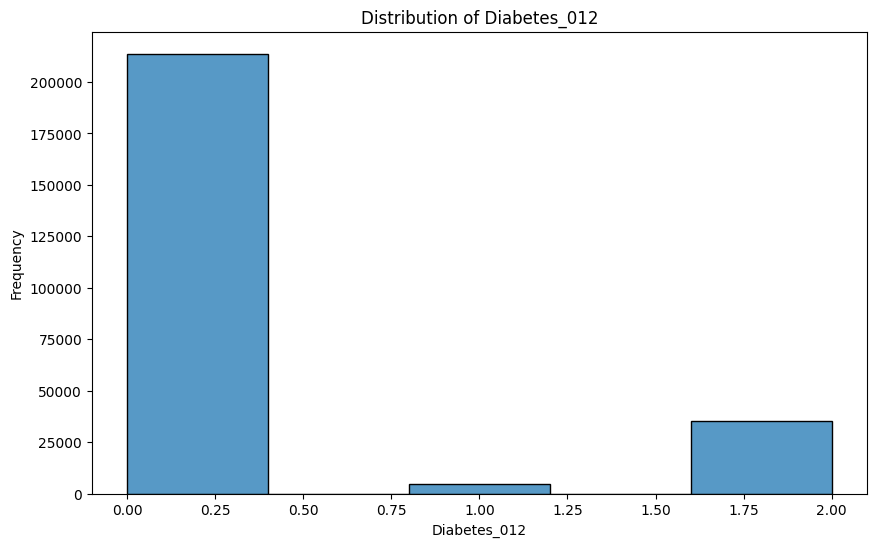

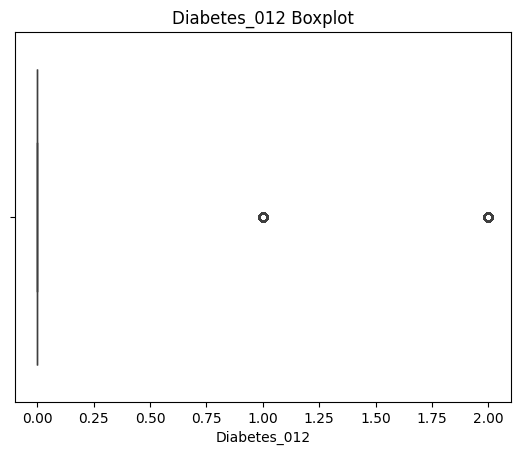

In [141]:
#histogram
def histogram(df_indicator, column_name):
    plt.figure(figsize=(10,6))
    sns.histplot(df_indicator[column_name], bins=5)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

histogram(df_indicator, 'Diabetes_012')

#boxplot to spot out the outliers
def boxplot(df, column_name):
  sns.boxplot(x=df[column_name])
  plt.title(f'{column_name} Boxplot')
  plt.show()

boxplot(df_indicator, 'Diabetes_012')

Data EDA:

In [142]:
def data_exploration(df):
    print("Missing values:")
    print(df.isnull().sum(), end="\n")
    print("Duplicate values:")
    print(df.duplicated().sum(), end="\n")
    print("Unique values:")
    print(df.nunique(), end="\n")
    print("Summary statistics of the data:")
    print(df.describe().T, end="\n")
    print("First 10 rows of the data:")
    print(df.head(10), end="\n")
    print(df.shape)

data_exploration(df_indicator)

Missing values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Duplicate values:
23899
Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCo

In [143]:
for col in df_indicator.columns:
  print(f"{col} : {df_indicator[col].value_counts()}\n")

Diabetes_012 : 0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

HighBP : 0.0    144851
1.0    108829
Name: HighBP, dtype: int64

HighChol : 0.0    146089
1.0    107591
Name: HighChol, dtype: int64

CholCheck : 1.0    244210
0.0      9470
Name: CholCheck, dtype: int64

BMI : 27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

Smoker : 0.0    141257
1.0    112423
Name: Smoker, dtype: int64

Stroke : 0.0    243388
1.0     10292
Name: Stroke, dtype: int64

HeartDiseaseorAttack : 0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

PhysActivity : 1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64

Fruits : 1.0    160898
0.0     92782
Name: Fruits, dtype: int64

Veggies : 1.0    205841
0.0     47839
Name: Veggies, dtype: int64

HvyAlcoholConsump : 0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dt

EDA Visualisation:

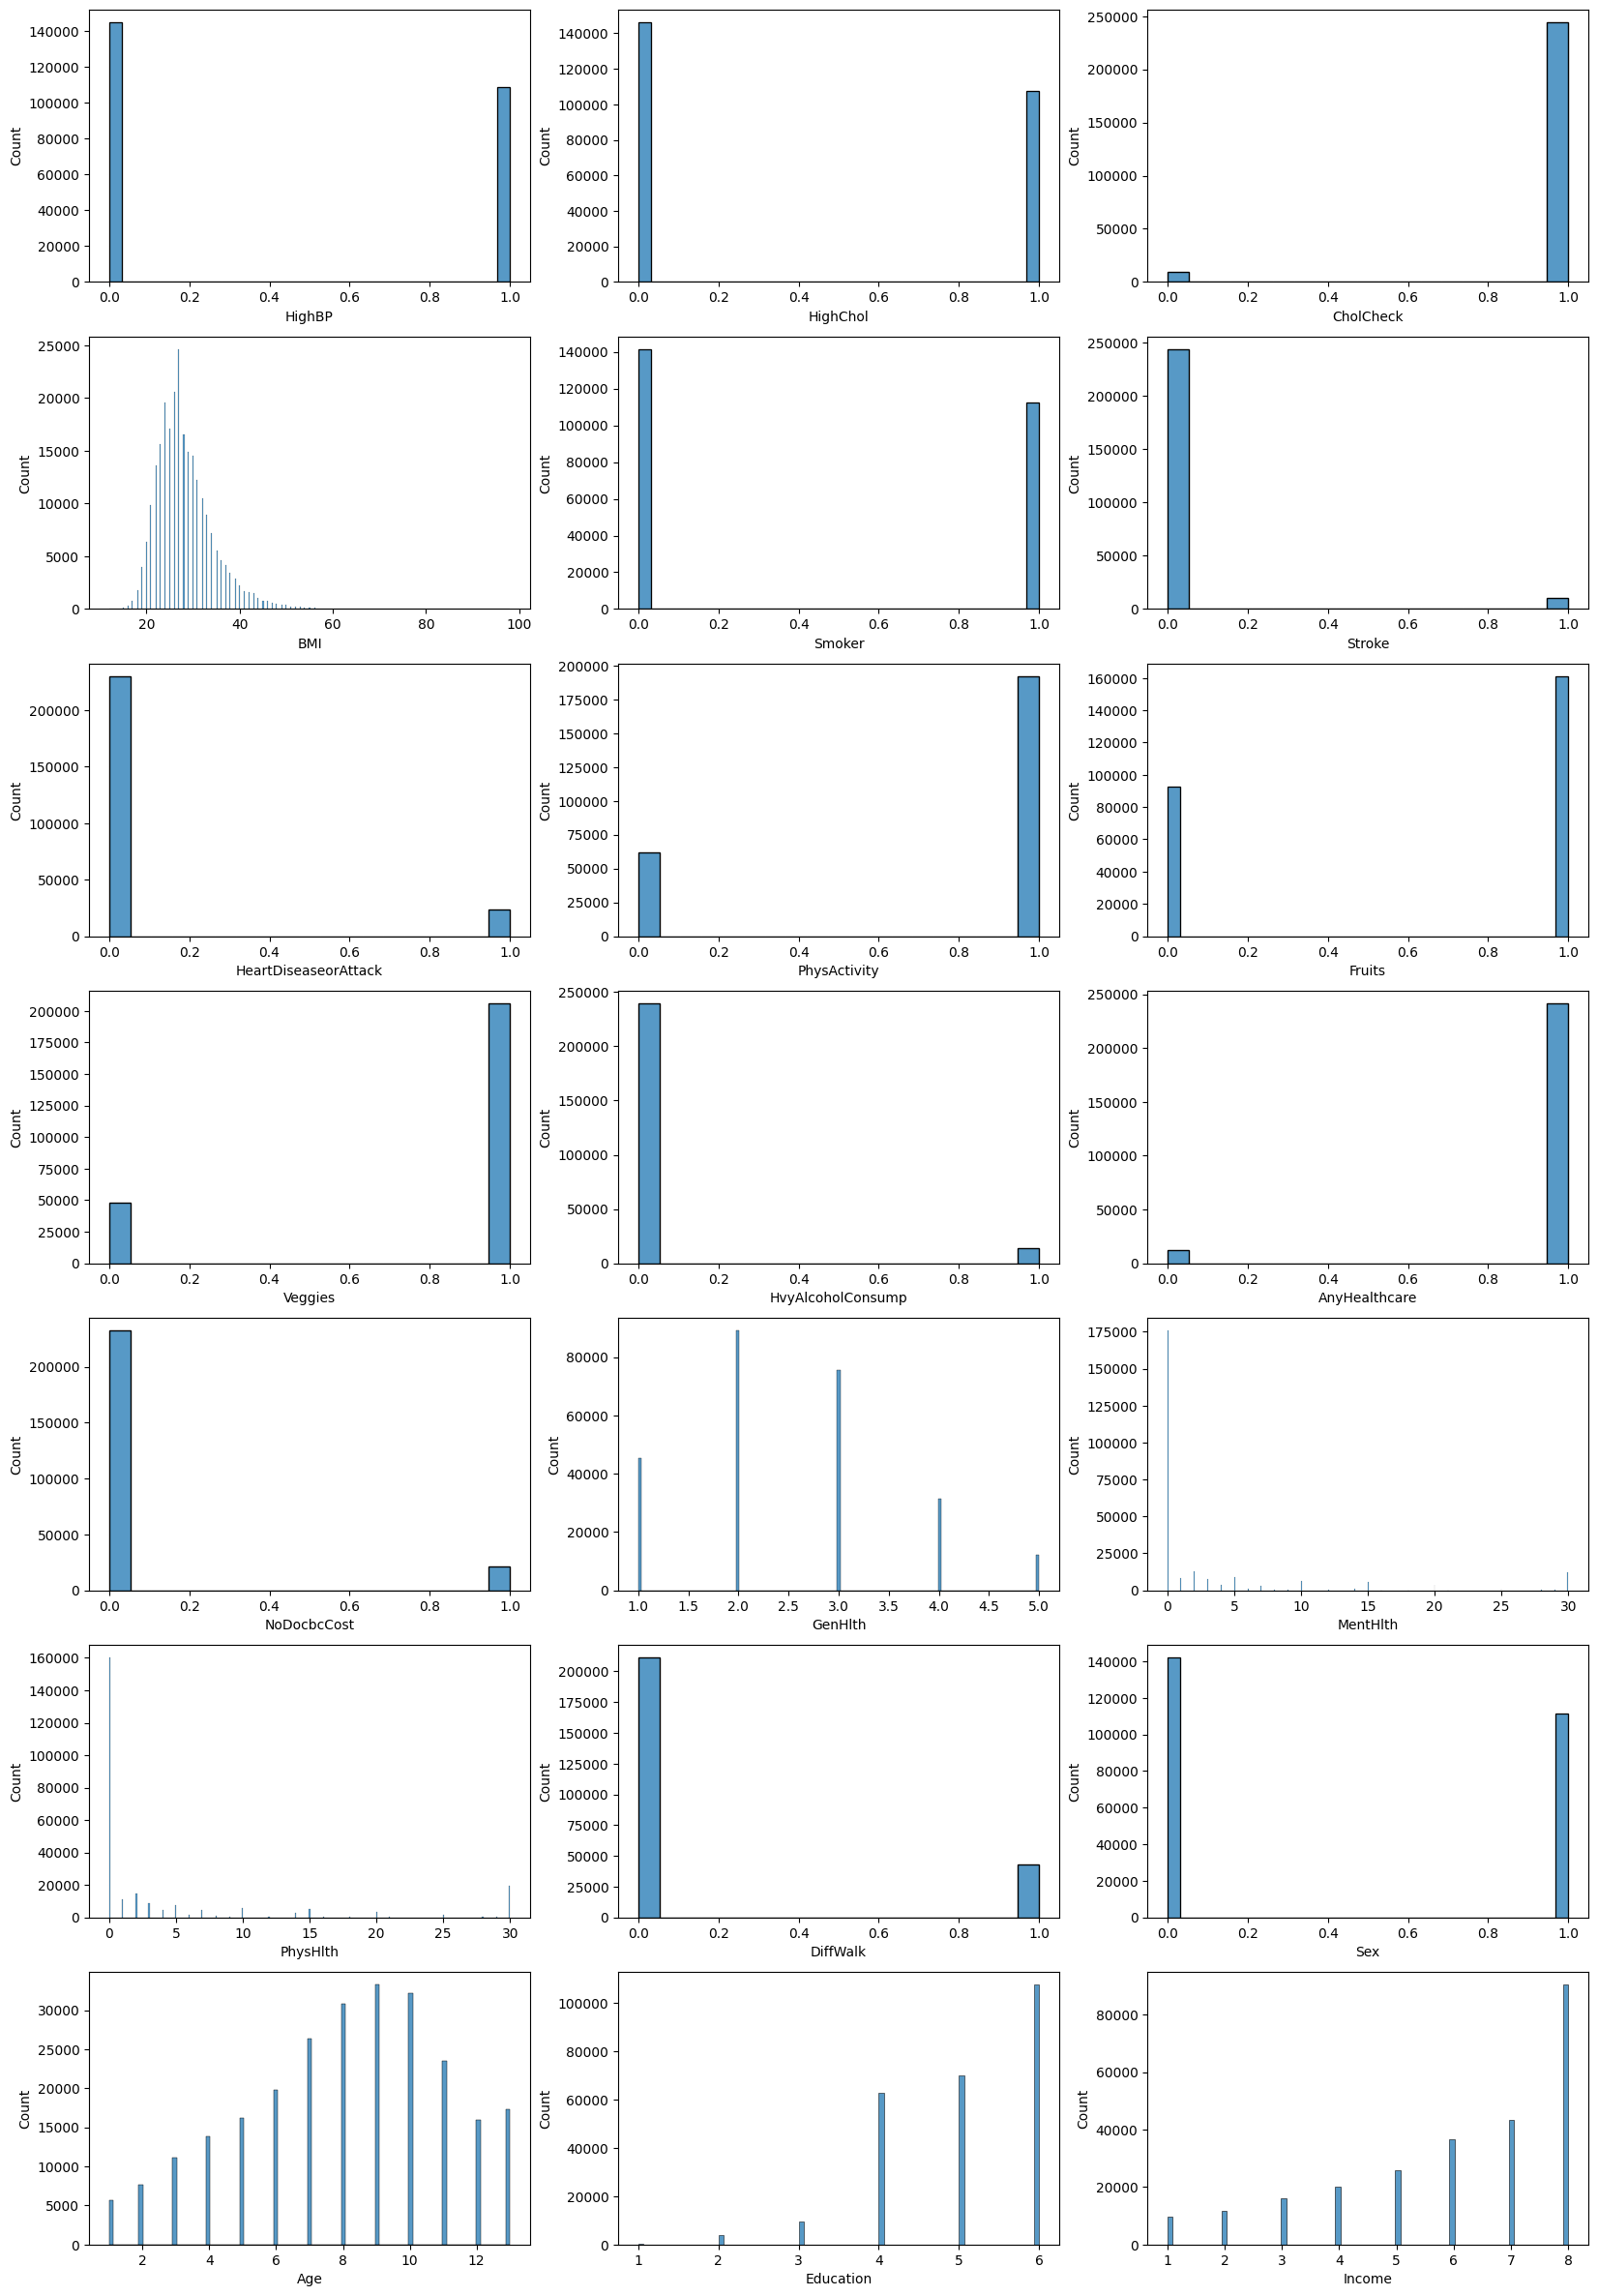

In [144]:
def histogram_grid(df):
    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], ax=axes[i//3, i%3])

histogram_grid(features)

#### Histograms description:
The histomgrams above describe the distribution of number of people having that feature. 

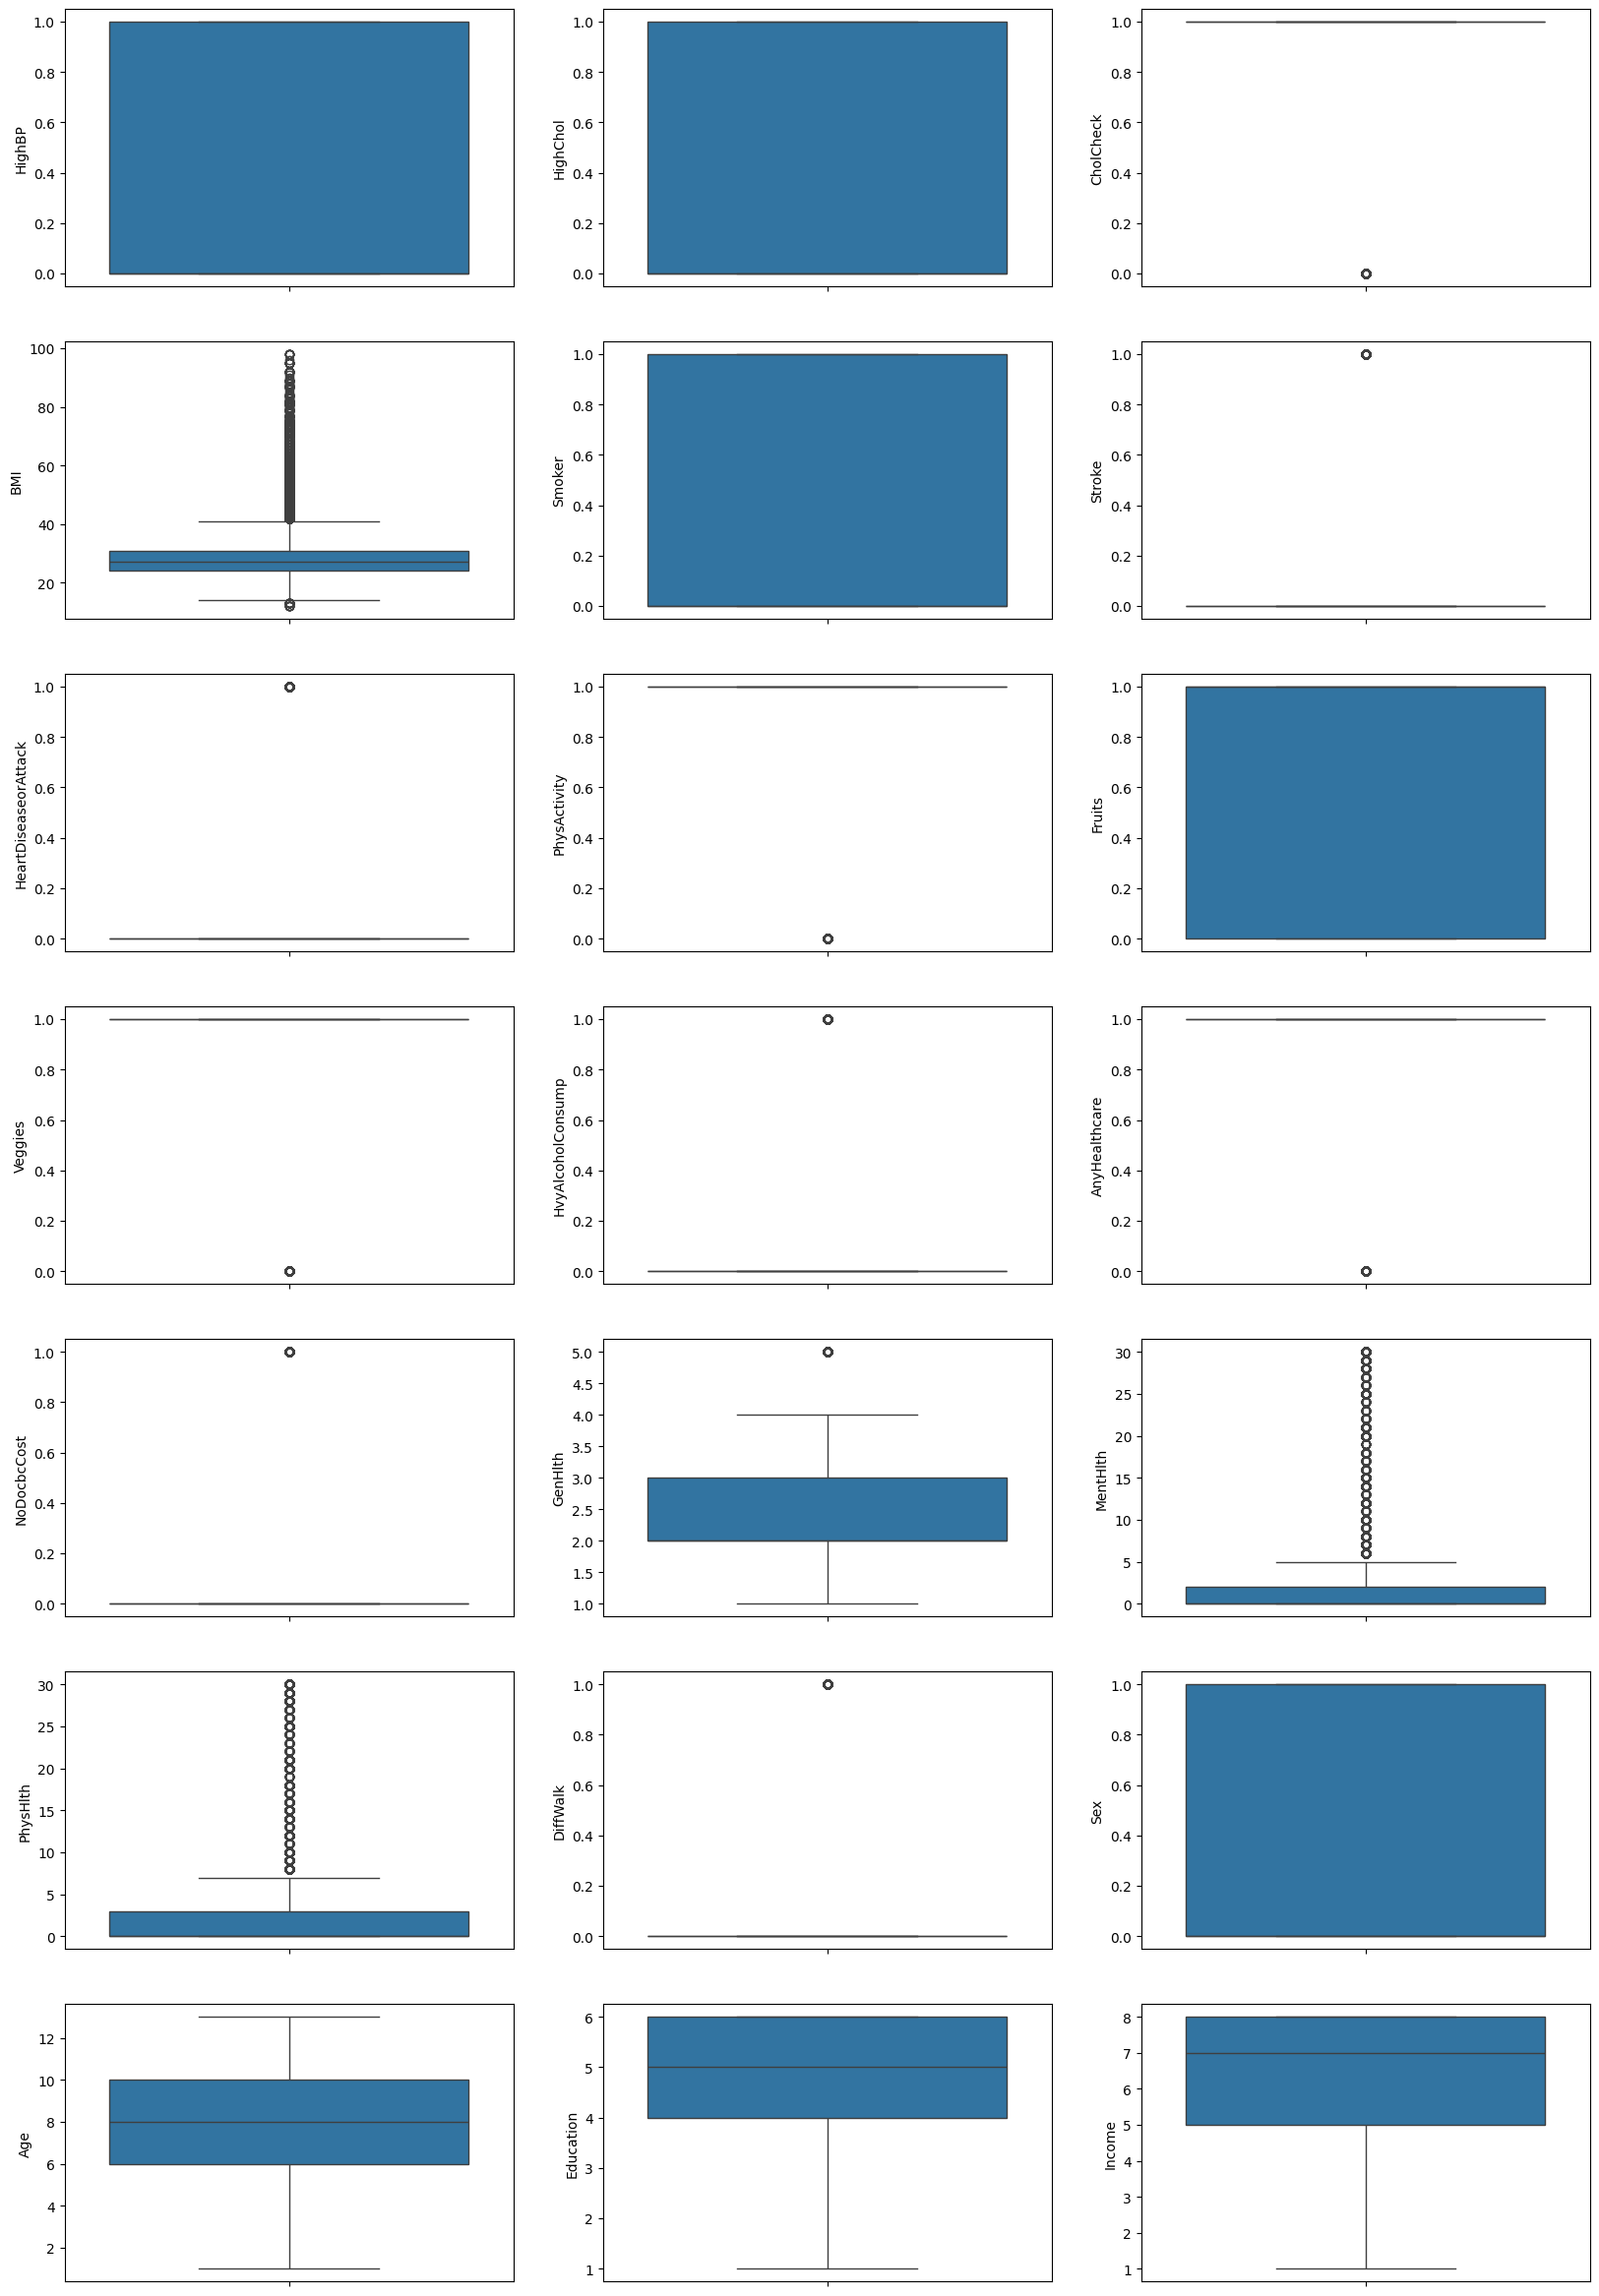

In [145]:
#boxplot
def boxplot_grid(df):
    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))
    for i, column in enumerate(df.columns):
        sns.boxplot(df[column], ax=axes[i//3, i%3])

boxplot_grid(features)

### Boxplot description
The Boxplots above describe the distribution of number of people having that feature. Additionally, the boxplots help define the outliers in each variable.

#### Diabete vs Non-diabete

Diabete percentage with non-diabete (pie charts)

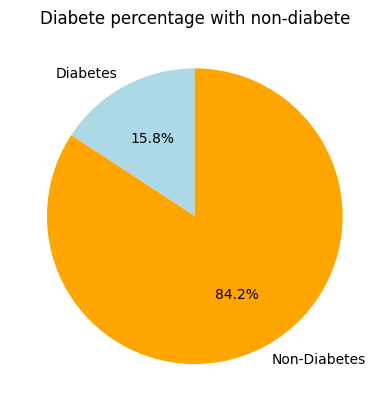

In [146]:
diabete_values = df_indicator[df_indicator['Diabetes_012'].isin([1, 2])]
non_diabete_values = df_indicator[df_indicator['Diabetes_012'].isin([0])]

#plotting a pie chart with the two values of diabete
labels = ['Diabetes', 'Non-Diabetes']
sizes = [len(diabete_values), len(non_diabete_values)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90,
        colors=['lightblue', 'orange'])
plt.title('Diabete percentage with non-diabete')
plt.show()

Diabete percentage by type

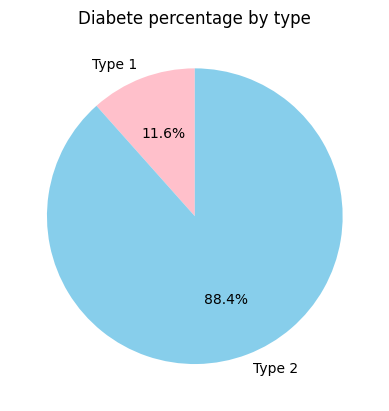

In [147]:
type1 = df_indicator[df_indicator['Diabetes_012'].isin([1])]
type2 = df_indicator[df_indicator['Diabetes_012'].isin([2])]

#plotting a pie chart with the values of diabete by type
labels = ['Type 1', 'Type 2']
sizes = [len(type1), len(type2)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90,
        colors=['pink', 'skyblue'])
plt.title('Diabete percentage by type')
plt.show()

#### Plotting diabete percentage by individual's social index (age, gender, income)

Diabetes by age (pie charts)

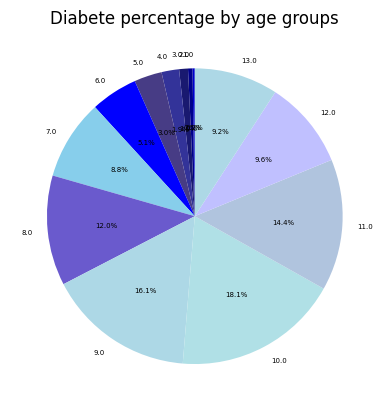

In [148]:
#group the diabete_values by age
grouped_diabete_values = diabete_values.groupby('Age').count()
#print(grouped_diabete_values)

#plotting a pie chart with the values of the diabete by age
labels = grouped_diabete_values.index
sizes = grouped_diabete_values['Diabetes_012']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90,
        colors=['#0000CD', '#00008B', '#191970', '#333399', '#473C85', '#0000FF',
                'skyblue', '#6A5ACD', '#ADD8E6', '#B0E0E6', '#B0C4DE', '#C0C0FF', "lightblue"],
        textprops={'size': 5})
plt.title('Diabete percentage by age groups')
plt.show()

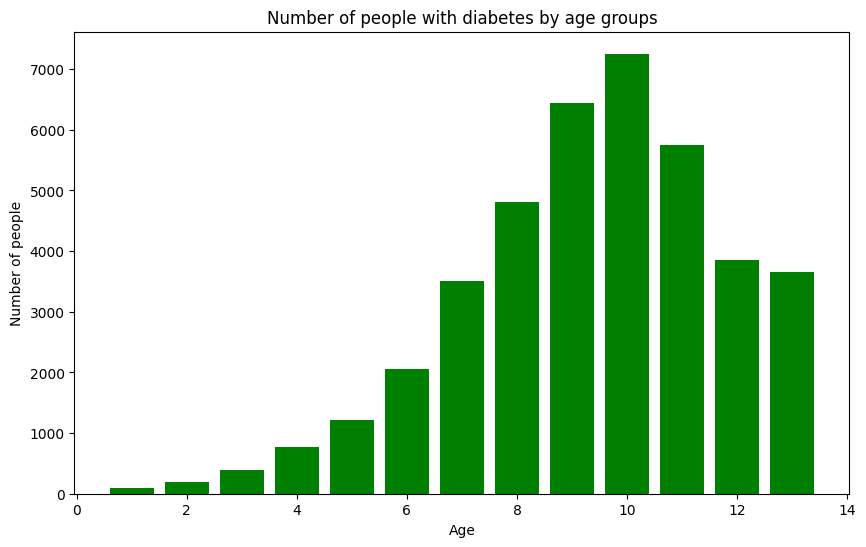

In [149]:
#plotting a bar chart with the values of the diabete by age
plt.figure(figsize=(10,6))
plt.bar(labels, sizes, color='green')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of people with diabetes by age groups')
plt.show()

Diabete type 1 by age

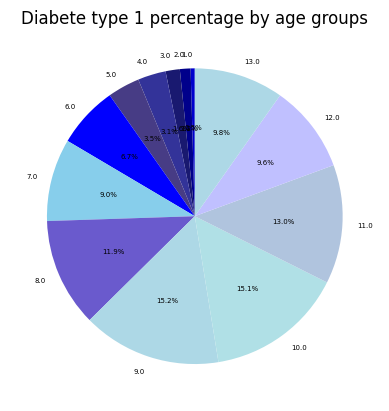

In [150]:
age_grouped_type1 = type1.groupby('Age').count()

#plotting a pie chart of people with diabete type 1 by age
labels_t1 = age_grouped_type1.index
sizes_t1 = age_grouped_type1['Diabetes_012']

plt.pie(sizes_t1, labels=labels_t1, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 5}, colors=['#0000CD', '#00008B', '#191970', '#333399', '#473C85', '#0000FF',
                'skyblue', '#6A5ACD', '#ADD8E6', '#B0E0E6', '#B0C4DE', '#C0C0FF', "lightblue"])
plt.title('Diabete type 1 percentage by age groups')
plt.show()


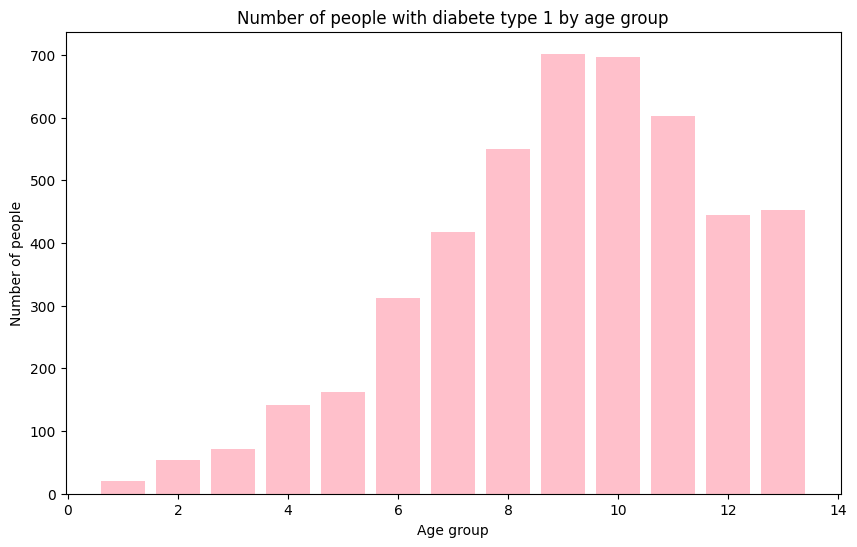

In [151]:
#plot a barchart for the diabete type 1 by age
plt.figure(figsize=(10,6))
plt.bar(labels_t1, sizes_t1, color='pink')
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.title('Number of people with diabete type 1 by age group')
plt.show()

Diabete type 2 by age

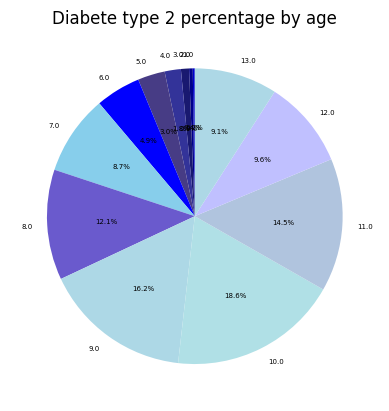

In [152]:
age_grouped_type2 = type2.groupby('Age').count()

#plotting a pie chart of people with diabete type 1 by age
labels_t2 = age_grouped_type2.index
sizes_t2 = age_grouped_type2['Diabetes_012']

plt.pie(sizes_t2, labels=labels_t2, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 5}, colors=['#0000CD', '#00008B', '#191970', '#333399', '#473C85', '#0000FF',
                'skyblue', '#6A5ACD', '#ADD8E6', '#B0E0E6', '#B0C4DE', '#C0C0FF', "lightblue"])
plt.title('Diabete type 2 percentage by age')
plt.show()

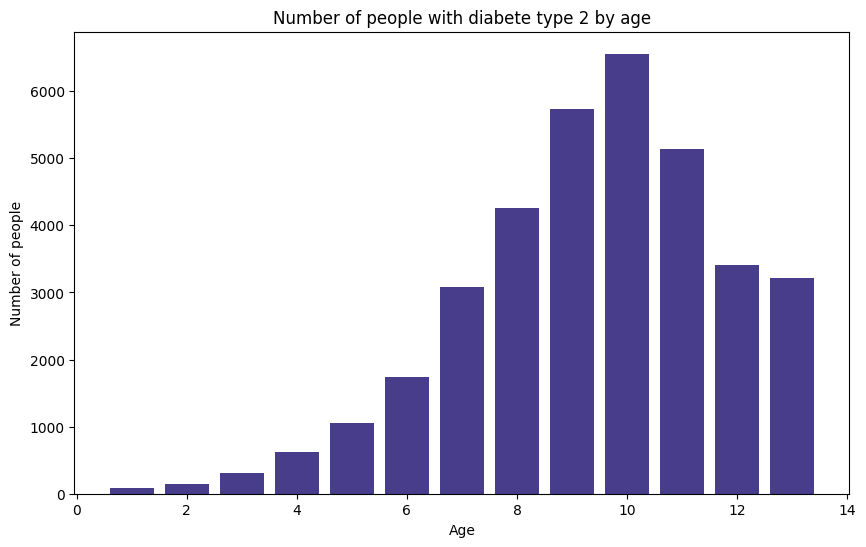

In [153]:
#plot a barchart for the diabete type 2 by age
plt.figure(figsize=(10,6))
plt.bar(labels_t2, sizes_t2, color='#483D8B')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of people with diabete type 2 by age')
plt.show()

Diabetes by sex 

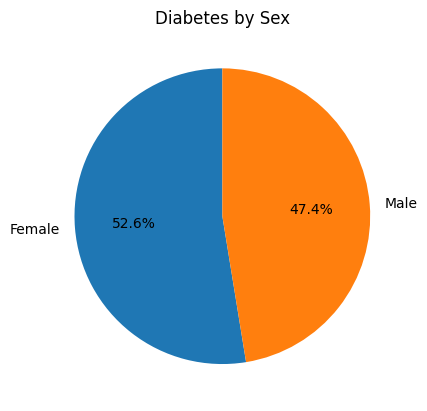

In [154]:
grouped_sex_diabetes = diabete_values.groupby('Sex').count()
#print(grouped_sex_diabetes)

#plotting a pie chart with the values of the diabete by sex
labels_sex_diabetes = ['Female', 'Male']
sizes_sex_diabetes = grouped_sex_diabetes['Diabetes_012']

plt.pie(sizes_sex_diabetes, labels=labels_sex_diabetes, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 10})
plt.title('Diabetes by Sex')
plt.show()


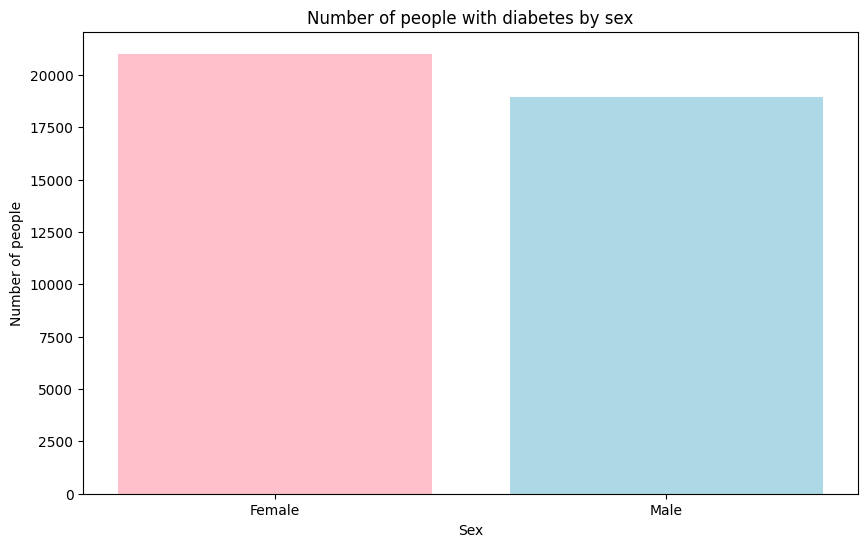

In [155]:

#plotting a bar chart with the values of the diabete by sex
plt.figure(figsize=(10,6))
plt.bar(labels_sex_diabetes, sizes_sex_diabetes, color=['pink', 'lightblue'])
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.title('Number of people with diabetes by sex')
plt.show()

Diabete type 1 by sex

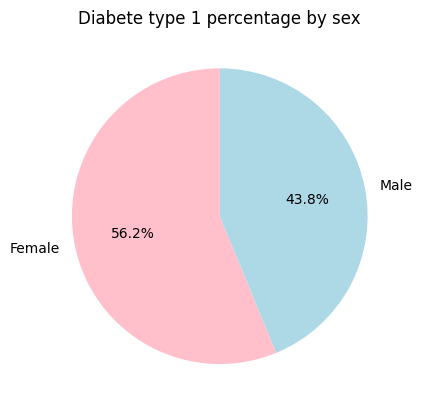

In [156]:
sex_type1 = type1.groupby('Sex').count()

#plotting a pie chart of people with diabete type 1 by sex
labels_sex_t1 = ['Female', 'Male']
sizes_sex_t1 = sex_type1['Diabetes_012']

plt.pie(sizes_sex_t1, labels=labels_sex_t1, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 10}, colors=['pink', 'lightblue'])
plt.title('Diabete type 1 percentage by sex')
plt.show()

Diabete type 2 by sex

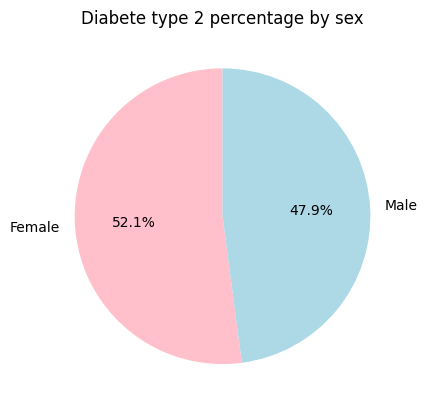

In [157]:
sex_type2 = type2.groupby('Sex').count()

#plotting a pie chart of people with diabete type 1 by sex
labels_sex_t2 = ['Female', 'Male']
sizes_sex_t2 = sex_type2['Diabetes_012']

plt.pie(sizes_sex_t2, labels=labels_sex_t2, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 10}, colors=['pink', 'lightblue'])
plt.title('Diabete type 2 percentage by sex')
plt.show()

Diabete by income groups

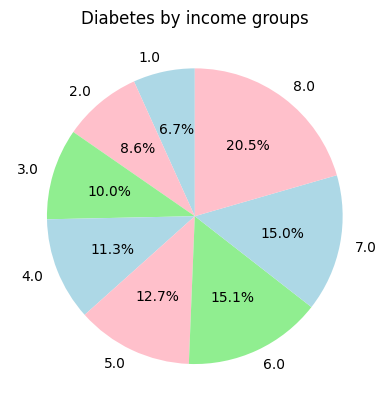

In [158]:
group_income_diabete = diabete_values.groupby('Income').count()

#plotting a pie chart with the values of the diabete by income groups
labels_income_diabete = group_income_diabete.index
sizes_income_diabete = group_income_diabete['Diabetes_012']

plt.pie(sizes_income_diabete, labels=labels_income_diabete, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 10}, colors=['lightblue', 'pink', 'lightgreen'])
plt.title('Diabetes by income groups')
plt.show()

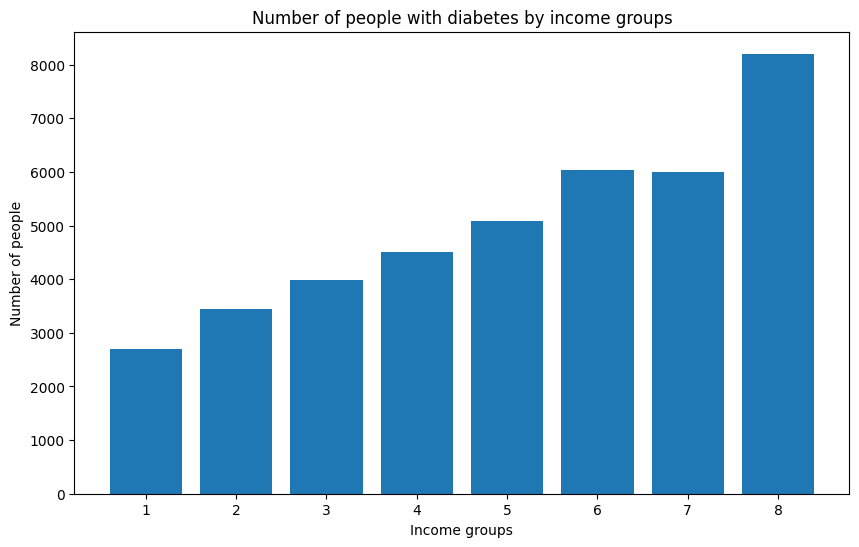

In [159]:
#plot a bar chart for the diabete by income groups
plt.figure(figsize=(10,6))
plt.bar(labels_income_diabete, sizes_income_diabete)
plt.xlabel('Income groups')
plt.ylabel('Number of people')
plt.title('Number of people with diabetes by income groups')
plt.show()

Diabete type 1 by income groups

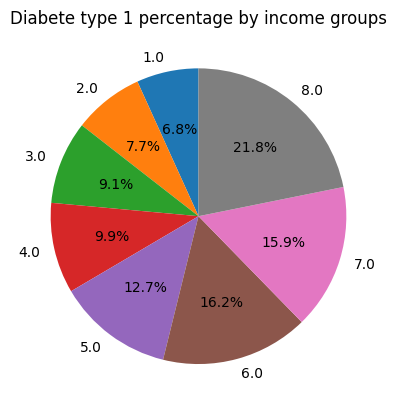

In [160]:
income_type1 = type1.groupby('Income').count()

#plotting a pie chart of people with diabete type 1 by income groups
labels_income_t1 = income_type1.index
sizes_income_t1 = income_type1['Diabetes_012']

plt.pie(sizes_income_t1, labels=labels_income_t1, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 10})
plt.title('Diabete type 1 percentage by income groups')
plt.show()

Diabete type 2 by income group

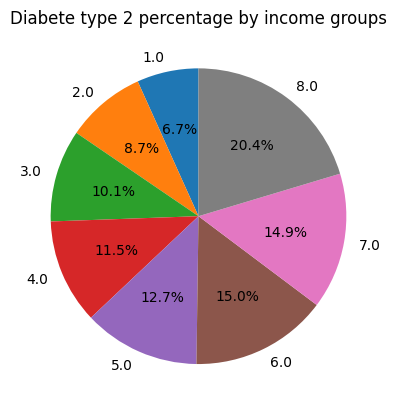

In [161]:
income_type2 = type2.groupby('Income').count()

#plotting a pie chart of people with diabete type 1 by income groups
labels_income_t2 = income_type2.index
sizes_income_t2 = income_type2['Diabetes_012']

plt.pie(sizes_income_t2, labels=labels_income_t2, autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'size': 10})
plt.title('Diabete type 2 percentage by income groups')
plt.show()

### Outlier analysis

In [162]:
#outlier analysis
Q1 = df_indicator.quantile(0.25)
Q3 = df_indicator.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_indicator < (Q1 - 1.5 * IQR)) | (df_indicator > (Q3 + 1.5 * IQR)))
print("Outliers:")
print(outliers.sum())

Outliers:
Diabetes_012            39977
HighBP                      0
HighChol                    0
CholCheck                9470
BMI                      9847
Smoker                      0
Stroke                  10292
HeartDiseaseorAttack    23893
PhysActivity            61760
Fruits                      0
Veggies                 47839
HvyAlcoholConsump       14256
AnyHealthcare           12417
NoDocbcCost             21354
GenHlth                 12081
MentHlth                36208
PhysHlth                40949
DiffWalk                42675
Sex                         0
Age                         0
Education                   0
Income                      0
dtype: int64


## Chi-square test

The variables are categorical type. Therefore, we conduct a chi-square test instead of ANOVA.

- H0: there are no associations between the variables 
- HA: there are signigicant associations between the the variables

In [163]:
#Chi-square test 
from scipy.stats import chi2_contingency
chi2, p_value, dof, _ = chi2_contingency(features, target)

print(f'P-value: {p_value}')
print(f'Chi-squared statistic: {chi2}')
print(f'Degrees of freedom: {dof}')

P-value: 0.0
Chi-squared statistic: 8686985.227785556
Degrees of freedom: 5073580


Conclusion:
The p-value is less than 0.05, indicating that there is a statistically significant association between the two variables. The chi-squared statistic is 8686985.2278, and the degrees of freedom are 5073580. This suggests that the association is strong and unlikely to be due to chance. Therefore, we can reject the null hypothesis and conclude that there is a significant association between the two variables.

## Correlation matrix

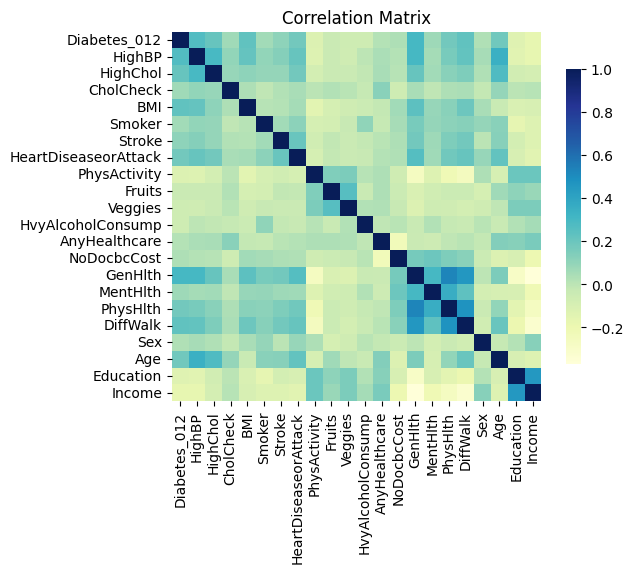

In [164]:
corr_matrix = df_indicator.corr()
sns.heatmap(corr_matrix, annot=False, cmap='YlGnBu', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [165]:
#Identify strong, moderate, and weak relationships
target_correlations = corr_matrix['Diabetes_012'].drop('Diabetes_012')
strong_corr = target_correlations[target_correlations.abs() >= 0.7]
moderate_corr = target_correlations[(target_correlations.abs() >= 0.3) & (target_correlations.abs() < 0.7)]
weak_corr = target_correlations[target_correlations.abs() < 0.3]
print("Strong Correlations:")
print(strong_corr)

print("Moderate Correlations:")
print(moderate_corr)

print("Weak Correlations:")
print(weak_corr)

Strong Correlations:
Series([], Name: Diabetes_012, dtype: float64)
Moderate Correlations:
GenHlth    0.302587
Name: Diabetes_012, dtype: float64
Weak Correlations:
HighBP                  0.271596
HighChol                0.209085
CholCheck               0.067546
BMI                     0.224379
Smoker                  0.062914
Stroke                  0.107179
HeartDiseaseorAttack    0.180272
PhysActivity           -0.121947
Fruits                 -0.042192
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
AnyHealthcare           0.015410
NoDocbcCost             0.035436
MentHlth                0.073507
PhysHlth                0.176287
DiffWalk                0.224239
Sex                     0.031040
Age                     0.185026
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


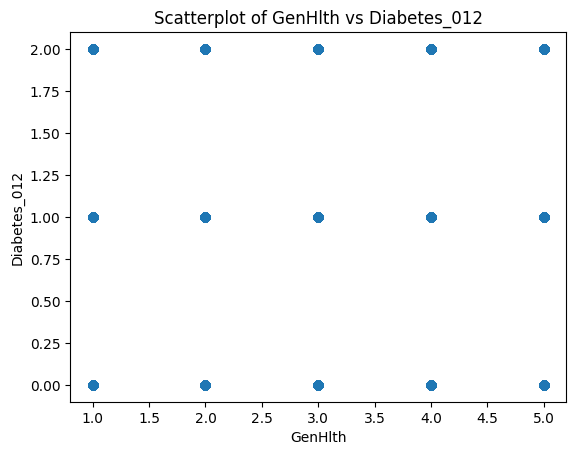

In [166]:
#create a scatterplot between the target the variable with the strongest correlation
def scatter_plot(df, target_variable, feature_variable):
    plt.scatter(df[feature_variable], df[target_variable])
    plt.title(f'Scatterplot of {feature_variable} vs {target_variable}')
    plt.xlabel(f'{feature_variable}')
    plt.ylabel(f'{target_variable}')
    plt.show()

scatter_plot(df_indicator, 'Diabetes_012', 'GenHlth')

### Correlation analysis conclusion
As shown the in  the correlation analysis, the correlation between the variables is not very strong. The correlation coefficient between the variables  is less than 0.7, which indicates that the variables are not highly correlated. Additionally, the scatter plots of the variables are not correlated or linearly correlated because the variables are mostly categorical. Therefore, we should consider a non-linear correlation analysis and non-linear models to make the prediction.

### Non-linear correlation analysis

Pearson correlation analysis

In [167]:
from scipy.stats import pearsonr
target = df_indicator['Diabetes_012']
features = df_indicator.drop('Diabetes_012', axis=1)

# calculate the Pearson correlation matrix
correlations = {}
for column in features.columns:
    corr, _ = pearsonr(features[column], target)
    correlations[column] = corr

print("Pearson correlation coefficients:")
for column, corr in correlations.items():
    print(f"{column}: {corr}")

#identify strong, moderate, and weak correlation
strong_corr = []
moderate_corr = []
weak_corr = []
for column, corr in correlations.items():
    if abs(corr) >= 0.7:
        strong_corr.append(column)
    elif abs(corr) <  0.7 and abs(corr) >= 0.4:
        moderate_corr.append(column)
    elif abs(corr) <= 0.4:
        weak_corr.append(column)

print("Strong correlations:")
print(strong_corr)
print("Moderate correlations:")
print(moderate_corr)
print("Weak correlations:")
print(weak_corr)

Pearson correlation coefficients:
HighBP: 0.2715964243298834
HighChol: 0.20908491100576174
CholCheck: 0.06754647611600015
BMI: 0.2243794737583985
Smoker: 0.0629140950601671
Stroke: 0.10717866994339768
HeartDiseaseorAttack: 0.180271686335603
PhysActivity: -0.12194716655035256
Fruits: -0.04219162985450721
Veggies: -0.05897159923470445
HvyAlcoholConsump: -0.057881911738185896
AnyHealthcare: 0.015410377239766687
NoDocbcCost: 0.035435685001551115
GenHlth: 0.30258662088597926
MentHlth: 0.07350676620655913
PhysHlth: 0.1762867357056404
DiffWalk: 0.22423912328804918
Sex: 0.031040163652105678
Age: 0.18502579410172623
Education: -0.13051691771156246
Income: -0.17148303762778488
Strong correlations:
[]
Moderate correlations:
[]
Weak correlations:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Inc

Spearman correlation analysis

In [168]:
from scipy.stats import spearmanr

correlation_spm = {}
for column in features.columns:
    corr, _ = spearmanr(features[column], target)
    correlation_spm[column] = corr

print("Spearman correlation coefficients:")
for column, corr in correlation_spm.items():
    print(f"{column}: {corr}")

strong_corr_spm = []
moderate_corr_spm = []
weak_corr_spm = []
for column, corr in correlations.items():
    if abs(corr) >= 0.7:
        strong_corr_spm.append(column)
    elif abs(corr) <  0.7 and abs(corr) >= 0.4:
        moderate_corr_spm.append(column)
    elif abs(corr) <= 0.4:
        weak_corr_spm.append(column)

print("Strong correlations:")
print(strong_corr_spm)
print("Moderate correlations:")
print(moderate_corr_spm)
print("Weak correlations:")
print(weak_corr_spm)

Spearman correlation coefficients:
HighBP: 0.27166841345414633
HighChol: 0.2106682821541761
CholCheck: 0.06801792430598762
BMI: 0.23588659428538422
Smoker: 0.06304026187145856
Stroke: 0.10588669145854132
HeartDiseaseorAttack: 0.1785640439655792
PhysActivity: -0.12198754459538078
Fruits: -0.04226752156615391
Veggies: -0.059353460335424636
HvyAlcoholConsump: -0.0572440817585008
AnyHealthcare: 0.01453025017125737
NoDocbcCost: 0.03737877317157159
GenHlth: 0.2971383409897243
MentHlth: 0.04492132404865643
PhysHlth: 0.1617180495160748
DiffWalk: 0.2235670243435897
Sex: 0.03014258406408302
Age: 0.18635696612563438
Education: -0.12686223514699366
Income: -0.172611002313961
Strong correlations:
[]
Moderate correlations:
[]
Weak correlations:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'

Kendall correlation analysis

In [169]:
from scipy.stats import kendalltau

correlation_kendall = {}
for column in features.columns:
    corr, _ = kendalltau(features[column], target)
    correlation_kendall[column] = corr

print("Kendall correlation coefficients:")
for column, corr in correlation_kendall.items():
    print(f"{column}: {corr}")

strong_corr_ken = []
moderate_corr_ken = []
weak_corr_ken = []
for column, corr in correlations.items():
    if abs(corr) >= 0.7:
        strong_corr_ken.append(column)
    elif abs(corr) <  0.7 and abs(corr) >= 0.4:
        moderate_corr_ken.append(column)
    elif abs(corr) <= 0.4:
        weak_corr_ken.append(column)

print("Strong correlations:")
print(strong_corr_ken)
print("Moderate correlations:")
print(moderate_corr_ken)
print("Weak correlations:")
print(weak_corr_ken)

Kendall correlation coefficients:
HighBP: 0.26950860505402957
HighChol: 0.20899343479283
CholCheck: 0.06747717066294633
BMI: 0.19621320745522947
Smoker: 0.06253908146036702
Stroke: 0.10504487491179976
HeartDiseaseorAttack: 0.1771444305581458
PhysActivity: -0.12101772362805957
Fruits: -0.04193148784412496
Veggies: -0.05888159060063088
HvyAlcoholConsump: -0.0567889819290175
AnyHealthcare: 0.014414732301599046
NoDocbcCost: 0.03708160580030615
GenHlth: 0.2692544876991388
MentHlth: 0.04162878999720579
PhysHlth: 0.1479198459510846
DiffWalk: 0.22178962986836523
Sex: 0.029902945581879344
Age: 0.1576548767136396
Education: -0.11723000322751526
Income: -0.15207113622952853
Strong correlations:
[]
Moderate correlations:
[]
Weak correlations:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'

### Feature selection
Feature selection is the process of selecting a subset of the most relevant features from the original set of features


In [170]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(features, target)
print("Selected features:")
print(features.columns[selector.get_support(indices=True)])

Selected features:
Index(['HighBP', 'BMI', 'MentHlth', 'PhysHlth', 'DiffWalk'], dtype='object')


### Split the dataset into the ratio of 7:3 to train the model

In [171]:
#split datasset into the ratio of 7:3 to train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, target, test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 177576
Testing set size: 76104


### Model training (non-linear models)

In [172]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
LogisticReg = LogisticRegression()
LogisticReg.fit(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_test, y_test)

RandomForestClassifier()

In [174]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_test, y_test)

DecisionTreeClassifier()

### Make the predictions based on the test set

In [175]:
y_pred_lr = LogisticReg.predict(X_test)
y_pred_forest = forest.predict(X_test)
y_pred_tree = tree.predict(X_test)

### Evaluate the models

In [176]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model_name, x, y):
    # compute confusion matrix
    print(f'Confusion Matrix for model {model_name}')
    cm = confusion_matrix(y, x)
    print("Confusion Matrix:")
    print(cm)
    # compute accuracy
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    print("Accuracy:", accuracy)
    # compute precision
    precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print("Precision:", precision)
    # compute recall
    recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    print("Recall:", recall)
    # compute F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print("F1 Score:", f1)

confusionMatrix("Logistic Regression",y_test, y_pred_lr)
confusionMatrix("Random Forest" ,y_test, y_pred_forest)
confusionMatrix("Decision Tree", y_test, y_pred_tree)

Confusion Matrix for model Logistic Regression
Confusion Matrix:
[[63379  1384  9677]
 [    0     0     0]
 [  801    41   822]]
Accuracy: 0.8327945968674445
Precision: 0.9786297731729537
Recall: 1.0
F1 Score: 0.9891994818248505
Confusion Matrix for model Random Forest
Confusion Matrix:
[[63470  1180  7799]
 [   14   181     6]
 [  696    64  2694]]
Accuracy: 0.8363686534216336
Precision: 0.9817478731631863
Recall: 0.9997794719929431
F1 Score: 0.9906816301684174
Confusion Matrix for model Decision Tree
Confusion Matrix:
[[63791  1210  8111]
 [    3   182    16]
 [  386    33  2372]]
Accuracy: 0.8405997056659308
Precision: 0.981384901770742
Recall: 0.999952973633884
F1 Score: 0.9905819325284366


Based on the evaluation, Decision Tree has the highest Accuracy score: 84.05%.
To proceed, we should conduct a hypermarameter tuning.

### Hyperparameter tuning

In [177]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
   'max_depth': [None, 5, 10, 15],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Accuracy: ", grid_search.best_score_)


Best Accuracy:  0.8438752995855856


### Evaluate final model performance

In [178]:
#Evaluate the final model performance using 100% of the data
final_model = grid_search.best_estimator_
final_model.fit(features, target)
y_pred_final = final_model.predict(features)
confusionMatrix("Final Model", target, y_pred_final)

Confusion Matrix for model Final Model
Confusion Matrix:
[[210339   4290  30623]
 [     0      0      0]
 [  3364    341   4723]]
Accuracy: 0.8291508987701041
Precision: 0.98001202074277
Recall: 1.0
F1 Score: 0.9899051222680296


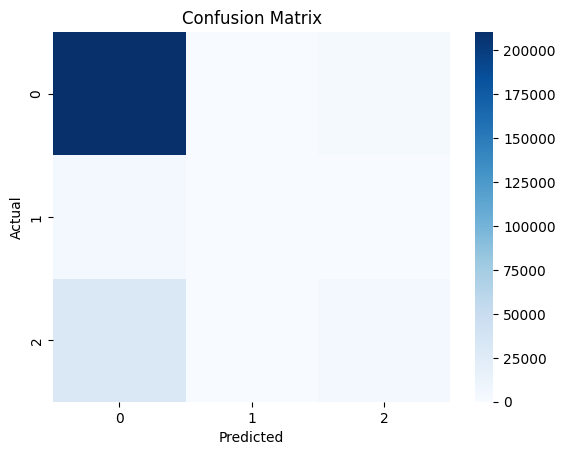

[[210339      0   3364]
 [  4290      0    341]
 [ 30623      0   4723]]


In [179]:
#make the final prediction
cm = confusion_matrix(target, y_pred_final)

sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(cm)

In [180]:
confusionMatrix("Final Model", target, y_pred_final)

Confusion Matrix for model Final Model
Confusion Matrix:
[[210339   4290  30623]
 [     0      0      0]
 [  3364    341   4723]]
Accuracy: 0.8291508987701041
Precision: 0.98001202074277
Recall: 1.0
F1 Score: 0.9899051222680296


### Results interpreting 

The confusion matrix shows the performance of the final model on the entire dataset. The true positive (TP) represents the number of patients correctly predicted to have diabetes, while the false positive (FP) represents the number of patients incorrectly predicted to have diabetes. The true negative (TN) represents the number of patients correctly predicted not to have diabetes, while the false negative (FN) represents the number of patients incorrectly predicted not to have diabetes.

The accuracy formula for a 3x3 confusion matrix:
Accuracy = (TP1 + TN1 + TP2 + TN2) / (TP1 + TN1 + FP1 + FN1 + TP2 + TN2 + FP2 + FN2)
Based on the confusion matrix analysis, the accuracy score is computed as 82.91% confidence.

In this case, the model has a high accuracy score of 82.91%. This means that the model is able to correctly predict the diabetes status of 82.91% of the individuals in the dataset.

In [181]:
#save the final model for further use
import joblib
joblib.dump(final_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

### **Summary, future plans, and room for improvement**


The work above has achieved the following criteria:
- Performing an EDA on individual's society status (age, gender, income)
- Calculating correlation between features using Pearson, Spearman, and Kendall correlation coefficients
- Identifying strong, moderate, and weak correlations between features and the target variable
- Performing feature selection to select the most relevant features
- Splitting the dataset into training and testing sets
- Training and testing to find the best models among the non-linear models for the predictive model.
- Evaluating the the models
- Finding the best models among the non-linear models for the predictive model
- Saving the results and best models for further uses and analysis

Future plans:
- Performing more EDA on other features to gain insights such as health status, nutrient status, physical condition, etc.
- Performing feature engineering to create new features that may improve the performance of the models.
- Using other machine learning algorithms such as Neural Network, Gradient Boosting, etc. to compare the results.
- Testing the best models on an unseen dataset to evaluate their performance.
- Deploying the best models on a GUI application.

Room for improvement:
- The current model is using the entire dataset to train and evaluate. In a real-world scenario, it would be beneficial to perform cross-validation to get a more reliable evaluation.
- The model may not be as accurate as it could be if it had been trained on a larger dataset. In such cases, using more data could help improve the model's performance.
- The model may not be as interpretable as it could be if it used more advanced techniques such as decision tree visualization. In such cases, using simpler models or techniques could help improve the model's interpretability.